# Fearure Engineering
* creating new features or transforming your existing features to get the most out of your data

# Fearure Engineering: Feature Creation

### Read in text

In [3]:
import pandas as pd
import re
import string
import nltk

pd.set_option('display.max_colwidth' ,100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv('spam.csv', encoding='latin-1')
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
data.columns = ['lable' , 'body_text']
data.head()

,lable,body_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


### Create feature for text message lenght

In [35]:
data['body_length'] = data['body_text'].apply(lambda x : len(x) - x.count(" "))
data.head()

,lable,body_text,body_length
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",92
1,ham,Ok lar... Joking wif u oni...,24
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
3,ham,U dun say so early hor... U c already then say...,39
4,ham,"Nah I don't think he goes to usf, he lives around here though",49


### Creat feature for % of text that is puncituation

In [36]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count / ( len(text) - text.count(" ") ) , 3) * 100

data['punct%'] = data['body_text'].apply(lambda x : count_punct(x))
data.head()

,lable,body_text,body_length,punct%
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",92,9.8
1,ham,Ok lar... Joking wif u oni...,24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
3,ham,U dun say so early hor... U c already then say...,39,15.4
4,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1


### Evaluate creat feature

In [14]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

###  text message lenght shape

/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


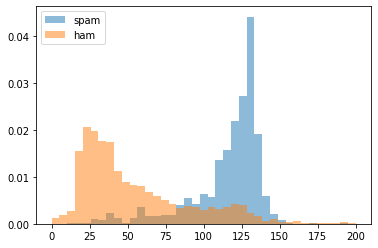

In [38]:
bins = np.linspace(0,200,40)

pyplot.hist(data[data['lable'] == 'spam']['body_length'] , bins , alpha = 0.5 , normed = True , label = 'spam')
pyplot.hist(data[data['lable'] == 'ham' ]['body_length'] , bins , alpha = 0.5 , normed = True , label = 'ham')
pyplot.legend(loc = 'upper left')
pyplot.show()                

### text that is puncituation shape

/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


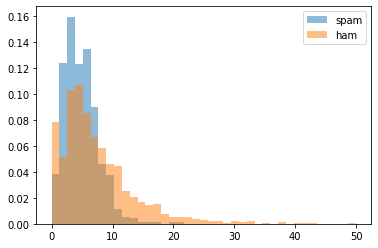

In [39]:
bins = np.linspace(0,50,40)

pyplot.hist(data[data['lable'] == 'spam']['punct%'] , bins , alpha = 0.5 , normed = True , label = 'spam')
pyplot.hist(data[data['lable'] == 'ham']['punct%'] , bins , alpha = 0.5 , normed = True , label = 'ham')
pyplot.legend(loc = 'upper right')
pyplot.show()                

# Fearure Engineering: Transformation

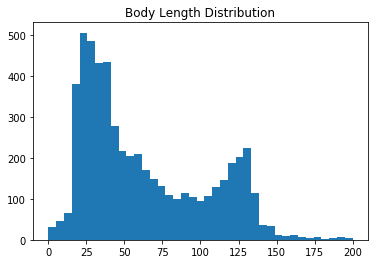

In [41]:
bins = np.linspace(0,200,40)
pyplot.hist(data['body_length'] , bins)
pyplot.title('Body Length Distribution')
pyplot.show()

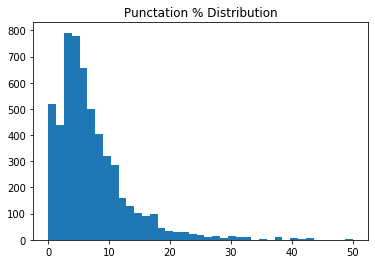

In [45]:
bins = np.linspace(0,50,40)
pyplot.hist(data['punct%'] , bins)
pyplot.title('Punctation % Distribution')
pyplot.show()